<!-- 
The **bias** of an estimator is how far off it is from the parameter, on average.

$$\begin{align}\text{Bias}(\hat{\theta}) = \mathbb{E}[\hat{\theta} - \theta] = \mathbb{E}[\hat{\theta}] - \theta\end{align}$$

For example, the bias of the sample mean as an estimator of the population mean is:

$$\begin{align}\mathbb{E}[\bar{X}_n - \mu]
&= \mathbb{E}[\frac{1}{n}\sum_{i=1}^n (X_i)] - \mu \\
&= \frac{1}{n}\sum_{i=1}^n \mathbb{E}[X_i] - \mu \\
&= \frac{1}{n} (n\mu) - \mu \\
&= 0\end{align}$$

Because its bias is equal to 0, the sample mean is said to be an **unbiased** estimator of the population mean.

The **variance** of an estimator is a measure of how much the estimator tends to vary from its mean value.

$$\begin{align}\text{Var}(\hat{\theta}) = \mathbb{E}\left[(\hat{\theta} - \mathbb{E}[\hat{\theta}])^2 \right]\end{align}$$

The **mean squared error** measures the "goodness" of an estimator by incorporating both the bias and variance. Formally, it is defined as:

$$\begin{align}\text{MSE}(\hat{\theta}) = \mathbb{E}\left[(\hat{\theta} - \theta)^2
\right]\end{align}$$ -->



::: {.callout-note collapse="false"}
## Learning Outcomes
* Compute the bias, variance, and MSE of an estimator for a parameter
* Introduction to model risk of fitted models
* Decompose the model risk into bias and variance terms
* Construct confidence intervals for hypothesis testing
* Understand the assumptions we make and its impact on our regression inference
* Compare regression and causation
* Experiment setup, confounding variables, average treatment effect, and covariate adjustment
:::

Last time, we introduced the idea of random variables and its effect on the observed relationship we use to fit models.

In this lecture, we will explore the decomposition of model risk from a fitted model, regression inference via hypothesis testing and considering the assumptions we make, and the environment of understanding causality in theory and in practice.

## Bias-Variance Tradeoff

Recall the model and the data we generated from that model in the last section:

$$\text{True relationship: } g(x)$$

$$\text{Observed relationship: }Y = g(x) + \epsilon$$

$$\text{Prediction: }\hat{Y}(x)$$

With this reformulated modeling goal, we can now revisit the Bias-Variance Tradeoff from two lectures ago (shown below): 

<p align="center">
<img src="images/bvt_old.png" width='600'>
</p>

In today's lecture, we'll explore a more mathematical version of the graph you see above by introducing the terms model risk, observation variance, model bias, and model variance. Eventually, we'll work our way up to an updated version of the Bias-Variance Tradeoff graph that you see below 

<p align="center">
<img src="images/bvt.png" width='600'>
</p>

### Performance of an Estimator
Suppose we want to estimate a target $Y$ using an estimator $\hat{Y}(x)$. For every estimator that we train, we can determine how good a model is by asking the following questions: 

* Do we get the right answer on average? **(Bias)** 
* How variable is the answer? **(Variance)**
* How close do we get to $Y$? **(Risk / MSE)**

<p align="center">
<img src="images/bias_v_variance.png" width='600'>
</p>

Ideally, we want our estimator to have low bias and low variance, but how can we mathematically quantify that? To do so, let's introduce a few terms.

### Model Risk

**Model risk** is defined as the mean square prediction error of the random variable $\hat{Y}$. It is an expectation across *all* samples we could have possibly gotten when fitting the model, which we can denote as random variables $X_1, X_2, \ldots, X_n, Y$. Model risk considers the model's performance on any sample that is theoretically possible, rather than the specific data that we have collected. 

$$\text{model risk }=E\left[(Y-\hat{Y(x)})^2\right]$$ 

What is the origin of the error encoded by model risk? Note that there are two types of errors:

* Chance errors: happen due to randomness alone
    * Source 1 **(Observation Variance)**: randomness in new observations $Y$ due to random noise $\epsilon$
    * Source 2 **(Model Variance)**: randomness in the sample we used to train the models, as samples $X_1, X_2, \ldots, X_n, Y$ are random
* **(Model Bias)**: non-random error due to our model being different from the true underlying function $g$

Recall the data-generating process we established earlier. There is a true underlying relationship $g$, observed data (with random noise) $Y$, and model $\hat{Y}$. 

<p align="center">
<img src="images/errors.png" alt='errors' width='600'>
</p>

To better understand model risk, we'll zoom in on a single data point in the plot above.

<p align="center">
<img src="images/breakdown.png" alt='breakdown' width='600'>
</p>

Remember that $\hat{Y}(x)$ is a random variable – it is the prediction made for $x$ after being fit on the specific sample used for training. If we had used a different sample for training, a different prediction might have been made for this value of $x$. To capture this, the diagram above considers both the prediction $\hat{Y}(x)$ made for a particular random training sample, and the *expected* prediction across all possible training samples, $E[\hat{Y}(x)]$. 

We can use this simplified diagram to break down the prediction error into smaller components. First, start by considering the error on a single prediction, $Y(x)-\hat{Y}(x)$.

<p align="center">
<img src="images/error.png" alt='error' width='600'>
</p>

We can identify three components of this error.

<p align="center">
<img src="images/decomposition.png" alt='decomposition' width='600'>
</p>

That is, the error can be written as:

$$Y(x)-\hat{Y}(x) = \epsilon + \left(g(x)-E\left[\hat{Y}(x)\right]\right) + \left(E\left[\hat{Y}(x)\right] - \hat{Y}(x)\right)$$
$$\newline   $$

The model risk is the expected square of the expression above, $E\left[(Y(x)-\hat{Y}(x))^2\right]$. If we square both sides and then take the expectation, we will get the following decomposition of model risk:

$$E\left[(Y(x)-\hat{Y}(x))^2\right] = E[\epsilon^2] + \left(g(x)-E\left[\hat{Y}(x)\right]\right)^2 + E\left[\left(E\left[\hat{Y}(x)\right] - \hat{Y}(x)\right)^2\right]$$

It looks like we are missing some cross-product terms when squaring the right-hand side, but it turns out that all of those cross-product terms are zero. The detailed derivation is out of scope for this class, but a proof is included at the end of this note for your reference.

This expression may look complicated at first glance, but we've actually already defined each term earlier in this lecture! Let's look at them term by term.


#### Observation Variance

The first term in the above decomposition is $E[\epsilon^2]$. Remember $\epsilon$ is the random noise when observing $Y$, with expectation $\mathbb{E}(\epsilon)=0$ and variance $\text{Var}(\epsilon) = \sigma^2$. We can show that $E[\epsilon^2]$ is the variance of $\epsilon$:
$$
\begin{align*}
\text{Var}(\epsilon) &= E[\epsilon^2] + \left(E[\epsilon]\right)^2\\
&= E[\epsilon^2] + 0^2\\
&= \sigma^2.
\end{align*}
$$

This term describes how variable the random error $\epsilon$ (and $Y$) is for each observation. This is called the **observation variance**. It exists due to the randomness in our observations $Y$. It is a form of *chance error* we talked about in the Sampling lecture.

$$\text{observation variance} = \text{Var}(\epsilon) = \sigma^2.$$

The observation variance results from measurement errors when observing data or missing information that acts like noise. To reduce this observation variance, we could try to get more precise measurements, but it is often beyond the control of data scientists. Because of this, the observation variance $\sigma^2$ is sometimes called "irreducible error."

#### Model Variance

We will then look at the last term: $E\left[\left(E\left[\hat{Y}(x)\right] - \hat{Y}(x)\right)^2\right]$. If you recall the definition of variance from the last lecture, this is precisely $\text{Var}(\hat{Y}(x))$. We call this the **model variance**.

It describes how much the prediction $\hat{Y}(x)$ tends to vary when we fit the model on different samples. Remember the sample we collect can come out very differently, thus the prediction $\hat{Y}(x)$ will also be different. The model variance describes this variability due to the randomness in our sampling process. Like observation variance, it is also a form of *chance error*—even though the sources of randomness are different.

$$\text{model variance} = \text{Var}(\hat{Y}(x)) = E\left[\left(\hat{Y}(x) - E\left[\hat{Y}(x)\right]\right)^2\right]$$

The main reason for the large model variance is because of **overfitting**: we paid too much attention to the details in our sample that small differences in our random sample lead to large differences in the fitted model. To remediate this, we try to reduce model complexity (e.g. take out some features and limit the magnitude of estimated model coefficients) and not fit our model on the noises.

#### Model Bias

Finally, the second term is $\left(g(x)-E\left[\hat{Y}(x)\right]\right)^2$. What is this? The term $E\left[\hat{Y}(x)\right] - g(x)$ is called the **model bias**.

Remember that $g(x)$ is the fixed underlying truth and $\hat{Y}(x)$ is our fitted model, which is random. Model bias therefore measures how far off $g(x)$ and $\hat{Y}(x)$ are on average over all possible samples.

$$\text{model bias} = E\left[\hat{Y}(x) - g(x)\right] = E\left[\hat{Y}(x)\right] - g(x)$$

The model bias is not random; it's an average measure for a specific individual $x$. If bias is positive, our model tends to overestimate $g(x)$; if it's negative, our model tends to underestimate $g(x)$. And if it's 0, we can say that our model is **unbiased**.

::: {.callout-tip}
##### Unbiased Estimators 

An **unbiased model** has a $\text{model bias } = 0$. In other words, our model predicts $g(x)$ on average. 

Similarly, we can define bias for estimators like the mean. The sample mean is an **unbiased estimator** of the population mean, as by CLT, $\mathbb{E}[\bar{X}_n] = \mu$. Therefore, the $\text{estimator bias } = \mathbb{E}[\bar{X}_n] - \mu = 0$.
:::

There are two main reasons for large model biases:

- Underfitting: our model is too simple for the data
- Lack of domain knowledge: we don't understand what features are useful for the response variable

To fix this, we increase model complexity (but we don't want to overfit!) or consult domain experts to see which models make sense. You can start to see a tradeoff here: if we increase model complexity, we decrease the model bias, but we also risk increasing the model variance.


### The Decomposition
To summarize: 

* The **model risk**, $\mathbb{E}\left[(Y(x)-\hat{Y}(x))^2\right]$, is the mean squared prediction error of the model.
* The **observation variance**, $\sigma^2$, is the variance of the random noise in the observations. It describes how variable the random error $\epsilon$ is for each observation.
* The **model bias**, $\mathbb{E}\left[\hat{Y}(x)\right]-g(x)$, is how "off" the $\hat{Y}(x)$ is as an estimator of the true underlying relationship $g(x)$. 
* The **model variance**, $\text{Var}(\hat{Y}(x))$, describes how much the prediction $\hat{Y}(x)$ tends to vary when we fit the model on different samples. 

The above definitions enable us to simplify the decomposition of model risk before as:

$$ E[(Y(x) - \hat{Y}(x))^2] = \sigma^2 + (E[\hat{Y}(x)] - g(x))^2 + \text{Var}(\hat{Y}(x)) $$
$$\text{model risk } = \text{observation variance} + (\text{model bias})^2 \text{+ model variance}$$

This is known as the **bias-variance tradeoff**. What does it mean? Remember that the model risk is a measure of the model's performance. Our goal in building models is to keep model risk low; this means that we will want to ensure that each component of model risk is kept at a small value. 

Observation variance is an inherent, random part of the data collection process. We aren't able to reduce the observation variance, so we'll focus our attention on the model bias and model variance. 

In the Feature Engineering lecture, we considered the issue of overfitting. We saw that the model's error or bias tends to decrease as model complexity increases — if we design a highly complex model, it will tend to make predictions that are closer to the true relationship $g$. At the same time, model variance tends to *increase* as model complexity increases; a complex model may overfit to the training data, meaning that small differences in the random samples used for training lead to large differences in the fitted model. We have a problem. To decrease model bias, we could increase the model's complexity, which would lead to overfitting and an increase in model variance. Alternatively, we could decrease model variance by decreasing the model's complexity at the cost of increased model bias due to underfitting. 

<p align="center">
<img src="images/bvt.png" alt='bvt' width='600'>
</p>

We need to strike a balance. Our goal in model creation is to use a complexity level that is high enough to keep bias low, but not so high that model variance is large.

## Interpreting Regression Coefficients

Recall the framework we established earlier in this lecture. If we assume that the underlying relationship between our observations and input features is linear, we can express this relationship in terms of the unknown, true model parameters $\theta$.

$$f_{\theta}(x) = g(x) + \epsilon = \theta_0 + \theta_1 x_1 + \ldots + \theta_p x_p + \epsilon$$

Our model attempts to estimate each true parameter $\theta_i$ using the estimates $\hat{\theta}_i$ calculated from the design matrix $\Bbb{X}$ and response vector $\Bbb{Y}$.

$$f_{\hat{\theta}}(x) = \hat{\theta}_0 + \hat{\theta}_1 x_1 + \ldots + \hat{\theta}_p x_p$$

Let's pause for a moment. At this point, we're very used to working with the idea of a model parameter. But what exactly does each coefficient $\theta_i$ actually *mean*? We can think of each $\theta_i$ as a *slope* of the linear model – if all other variables are held constant, a unit change in $x_i$ will result in a $\theta_i$ change in $f_{\theta}(x)$. Broadly speaking, a large value of $\theta_i$ means that the feature $x_i$ has a large effect on the response; conversely, a small value of $\theta_i$ means that $x_i$ has little effect on the response. In the extreme case, if the true parameter $\theta_i$ is 0, then the feature $x_i$ has **no effect** on $Y(x)$. 

If the true parameter $\theta_i$ for a particular feature is 0, this tells us something pretty significant about the world: there is no underlying relationship between $x_i$ and $Y(x)$! How then, can we test if a parameter is 0? As a baseline, we go through our usual process of drawing a sample, using this data to fit a model, and computing an estimate $\hat{\theta}_i$. However, we need to also consider the fact that if our random sample had come out differently, we may have found a different result for $\hat{\theta}_i$. To infer if the true parameter $\theta_i$ is 0, we want to draw our conclusion from the distribution of $\hat{\theta}_i$ estimates we could have drawn across all other random samples. This is where [hypothesis testing](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html) comes in handy! 

To test if the true parameter $\theta_i$ is 0, we construct a **hypothesis test** where our null hypothesis states that the true parameter $\theta_i$ is 0 and the alternative hypothesis states that the true parameter $\theta_i$ is *not* 0. If our p-value is smaller than our cutoff value (usually p=0.05), we reject the null hypothesis. 

## Hypothesis Testing through Bootstrap: PurpleAir Demo

An equivalent way to execute the hypothesis test described above is through **bootstrapping** (this equivalence can be proven through the [duality argument](https://stats.stackexchange.com/questions/179902/confidence-interval-p-value-duality-vs-frequentist-interpretation-of-cis), which is out of scope for this class). We use bootstrapping to compute approximate 95% confidence intervals for each $\theta_i$. If the interval doesn't contain 0, we reject the null hypothesis at the 5% level. Otherwise, the data is consistent with the null, as the true parameter *could* be 0.

To show an example of this hypothesis testing process, we'll work with the [snowy plover](https://www.audubon.org/field-guide/bird/snowy-plover) dataset throughout this section. The data are about the eggs and newly-hatched chicks of the Snowy Plover. The data were collected at the Point Reyes National Seashore by a former [student at Berkeley](https://openlibrary.org/books/OL2038693M/BLSS_the_Berkeley_interactive_statistical_system). Here's a [parent bird and some eggs](http://cescos.fau.edu/jay/eps/articles/snowyplover.html).

<p align="center">
<img src="images/plover_eggs.jpg" alt='bvt' width='550'>
</p>

Note that `Egg Length` and `Egg Breadth` (widest diameter) are measured in millimeters, and `Egg Weight` and `Bird Weight` are measured in grams; for comparison, a standard paper clip weighs about one gram.

<!-- To show an example of this hypothesis testing process, we'll work with air quality measurement data. There are 2 common sources of air quality information: Air Quality System (AQS) and [PurpleAir sensors](https://www2.purpleair.com/). AQS is seen as the gold standard because it is high quality, well-calibrated, and publicly available. However, it is very expensive, and the sensors are far apart; reports are also delayed due to extensive calibration.  -->
<!-- On the other hand, PurpleAir (PA) sensors are much cheaper, easier to install, and measurements are taken every 2 minutes for denser coverage. However, they are much less accurate than AQS.  -->
<!-- For this demo, our goal is to use AQS sensor measurements to improve PurpleAir measurements by training a model that adjusts PA measurements based on AQS measurements
$$PA \approx \theta_0 + \theta_1 AQS$$
Using this approximation, we'll invert the model to predict the true air quality from PA measurements
::: {.callout-tip collapse="true"}
### Inverse Model Derivation 
Intuitively, AQS measurements are very accurate, so we can treat AQS as the true air quality $AQS = \text{True Air Quality}$
$$
\begin{align}
PA &\approx \theta_0 + \theta_1 AQS \\
&\approx \theta_0 + \theta_1 \text{True Air Quality} \\
PA - \theta_0 &\approx + \theta_1 \text{True Air Quality} \\
\frac{PA - \theta_0}{\theta_1} &\approx \text{True Air Quality} \\
\text{True Air Quality } &\approx -\frac{\theta_0}{\theta_1} + \frac{1}{\theta_1} PA 
\end{align}
$$
:::
$$ \text{True Air Quality } \approx -\frac{\theta_0}{\theta_1} + \frac{1}{\theta_1} PA$$ -->

In [2]:
# import numpy as np
# import pandas as pd
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn.linear_model as lm
# from sklearn.linear_model import LinearRegression

# # big font helper
# def adjust_fontsize(size=None):
#     SMALL_SIZE = 8
#     MEDIUM_SIZE = 10
#     BIGGER_SIZE = 12
#     if size != None:
#         SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

#     plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#     plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#     plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#     plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#     plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#     plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.style.use('fivethirtyeight')
# sns.set_context("talk")
# sns.set_theme()
# #plt.style.use('default') # revert style to default mpl
# adjust_fontsize(size=20)
# %matplotlib inline
# csv_file = 'data/Full24hrdataset.csv'
# usecols = ['Date', 'ID', 'region', 'PM25FM', 'PM25cf1', 'TempC', 'RH', 'Dewpoint']
# full_df = (pd.read_csv(csv_file, usecols=usecols, parse_dates=['Date'])
#         .dropna())
# full_df.columns = ['date', 'id', 'region', 'pm25aqs', 'pm25pa', 'temp', 'rh', 'dew']
# full_df = full_df.loc[(full_df['pm25aqs'] < 50)]


# bad_dates = ['2019-08-21', '2019-08-22', '2019-09-24']
# GA = full_df.loc[(full_df['id'] == 'GA1') & (~full_df['date'].isin(bad_dates)) , :]
# AQS, PA = GA[['pm25aqs']], GA['pm25pa']
# AQS.head()
# pd.DataFrame(PA).head()


In [3]:
import pandas as pd
eggs = pd.read_csv("data/snowy_plover.csv")
eggs.head(5)

,egg_weight,egg_length,egg_breadth,bird_weight
0,7.4,28.80,21.84,5.2
1,7.7,29.04,22.45,5.4
2,7.9,29.36,22.48,5.6
3,7.5,30.10,21.71,5.3
4,8.3,30.17,22.75,5.9


Our goal will be to predict the weight of a newborn plover chick, which we assume follows the true relationship $Y = f_{\theta}(x)$ below.

$$\text{bird\_weight} = \theta_0 + \theta_1 \text{egg\_weight} + \theta_2 \text{egg\_length} + \theta_3 \text{egg\_breadth} + \epsilon$$

- For each $i$, the parameter $\theta_i$ is a fixed number but it is unobservable. We can only estimate it.
- The random error $\epsilon$ is also unobservable, but it is assumed to have expectation 0 and be independent and identically distributed across eggs.

Say we wish to determine if the `egg_weight` impacts the `bird_weight` of a chick – we want to infer if $\theta_1$ is equal to 0.

First, we define our hypotheses:

* **Null hypothesis**: the true parameter $\theta_1$ is 0; any variation is due to random chance.
* **Alternative hypothesis**: the true parameter $\theta_1$ is not 0.

Next, we use our data to fit a model $\hat{Y} = f_{\hat{\theta}}(x)$ that approximates the relationship above. This gives us the **observed value** of $\hat{\theta}_1$ found from our data.

In [4]:
#| code-fold: false
from sklearn.linear_model import LinearRegression
import numpy as np

X = eggs[["egg_weight", "egg_length", "egg_breadth"]]
Y = eggs["bird_weight"]

model = LinearRegression()
model.fit(X, Y)

# This gives an array containing the fitted model parameter estimates
thetas = model.coef_

# Put the parameter estimates in a nice table for viewing
display(pd.DataFrame([model.intercept_] + list(model.coef_),
             columns=['theta_hat'],
             index=['intercept', 'egg_weight', 'egg_length', 'egg_breadth']))

print("RMSE", np.mean((Y - model.predict(X)) ** 2))

,theta_hat
intercept,-4.605670
egg_weight,0.431229
egg_length,0.066570
egg_breadth,0.215914


RMSE 0.04547085380275766


We now have the value of $\hat{\theta}_1$ when considering the single sample of data that we have. To get a sense of how this estimate might vary if we were to draw different random samples, we will use **[bootstrapping](https://inferentialthinking.com/chapters/13/2/Bootstrap.html?)**. To construct a bootstrap sample, we will draw a resample from the collected data that:

* Has the same sample size as the collected data
* Is drawn with replacement (this ensures that we don't draw the exact same sample every time!)

We draw a bootstrap sample, use this sample to fit a model, and record the result for $\hat{\theta}_1$ on this bootstrapped sample. We then repeat this process many times to generate a **bootstrapped empirical distribution** of $\hat{\theta}_1$. This gives us an estimate of what the true distribution of $\hat{\theta}_1$ across all possible samples might look like.

In [5]:
#| code-fold: false
# Set a random seed so you generate the same random sample as staff
# In the "real world", we wouldn't do this
import numpy as np
np.random.seed(1337)

# Set the sample size of each bootstrap sample
n = len(eggs)

# Create a list to store all the bootstrapped estimates
estimates = []

# Generate a bootstrap resample from `eggs` and find an estimate for theta_1 using this sample. 
# Repeat 10000 times.
for i in range(10000):
    bootstrap_resample = eggs.sample(n, replace=True)
    X_bootstrap = bootstrap_resample[["egg_weight", "egg_length", "egg_breadth"]]
    Y_bootstrap = bootstrap_resample["bird_weight"]
    
    bootstrap_model = LinearRegression()
    bootstrap_model.fit(X_bootstrap, Y_bootstrap)
    bootstrap_thetas = bootstrap_model.coef_
    
    estimates.append(bootstrap_thetas[0])
    
# calculate the 95% confidence interval 
lower = np.percentile(estimates, 2.5, axis=0)
upper = np.percentile(estimates, 97.5, axis=0)
conf_interval = (lower, upper)
conf_interval

(-0.258648119568487, 1.103424385420405)

We find that our bootstrapped approximate 95% confidence interval for $\theta_1$ is $[-0.259, 1.103]$. Immediately, we can see that 0 *is* indeed contained in this interval – this means that we *cannot* conclude that $\theta_1$ is non-zero! More formally, we fail to reject the null hypothesis (that $\theta_1$ is 0) under a 5% p-value cutoff. 

## Colinearity

We can repeat this process to construct 95% confidence intervals for the other parameters of the model.

In [6]:
np.random.seed(1337)

theta_0_estimates = []
theta_1_estimates = []
theta_2_estimates = []
theta_3_estimates = []


for i in range(10000):
    bootstrap_resample = eggs.sample(n, replace=True)
    X_bootstrap = bootstrap_resample[["egg_weight", "egg_length", "egg_breadth"]]
    Y_bootstrap = bootstrap_resample["bird_weight"]
    
    bootstrap_model = LinearRegression()
    bootstrap_model.fit(X_bootstrap, Y_bootstrap)
    bootstrap_theta_0 = bootstrap_model.intercept_
    bootstrap_theta_1, bootstrap_theta_2, bootstrap_theta_3 = bootstrap_model.coef_
    
    theta_0_estimates.append(bootstrap_theta_0)
    theta_1_estimates.append(bootstrap_theta_1)
    theta_2_estimates.append(bootstrap_theta_2)
    theta_3_estimates.append(bootstrap_theta_3)
    
theta_0_lower, theta_0_upper = np.percentile(theta_0_estimates, 2.5), np.percentile(theta_0_estimates, 97.5)
theta_1_lower, theta_1_upper = np.percentile(theta_1_estimates, 2.5), np.percentile(theta_1_estimates, 97.5)
theta_2_lower, theta_2_upper = np.percentile(theta_2_estimates, 2.5), np.percentile(theta_2_estimates, 97.5)
theta_3_lower, theta_3_upper = np.percentile(theta_3_estimates, 2.5), np.percentile(theta_3_estimates, 97.5)

# Make a nice table to view results
pd.DataFrame({"lower":[theta_0_lower, theta_1_lower, theta_2_lower, theta_3_lower], "upper":[theta_0_upper, \
                theta_1_upper, theta_2_upper, theta_3_upper]}, index=["theta_0", "theta_1", "theta_2", "theta_3"])

,lower,upper
theta_0,-15.278542,5.161473
theta_1,-0.258648,1.103424
theta_2,-0.099138,0.208557
theta_3,-0.257141,0.758155


Something's off here. Notice that 0 is included in the 95% confidence interval for *every* parameter of the model. Using the interpretation we outlined above, this would suggest that we can't say for certain that *any* of the input variables impact the response variable! This makes it seem like our model can't make any predictions – and yet, each model we fit in our bootstrap experiment above could very much make predictions of $Y$. 

How can we explain this result? Think back to how we first interpreted the parameters of a linear model. We treated each $\theta_i$ as a slope, where a unit increase in $x_i$ leads to a $\theta_i$ increase in $Y$, **if all other variables are held constant**. It turns out that this last assumption is very important. If variables in our model are somehow related to one another, then it might not be possible to have a change in one of them while holding the others constant. This means that our interpretation framework is no longer valid! In the models we fit above, we incorporated `egg_length`, `egg_breadth`, and `egg_weight` as input variables. These variables are very likely related to one another – an egg with large `egg_length` and `egg_breadth` will likely be heavy in `egg_weight`. This means that the model parameters cannot be meaningfully interpreted as slopes. 

To support this conclusion, we can visualize the relationships between our feature variables. Notice the strong positive association between the features.

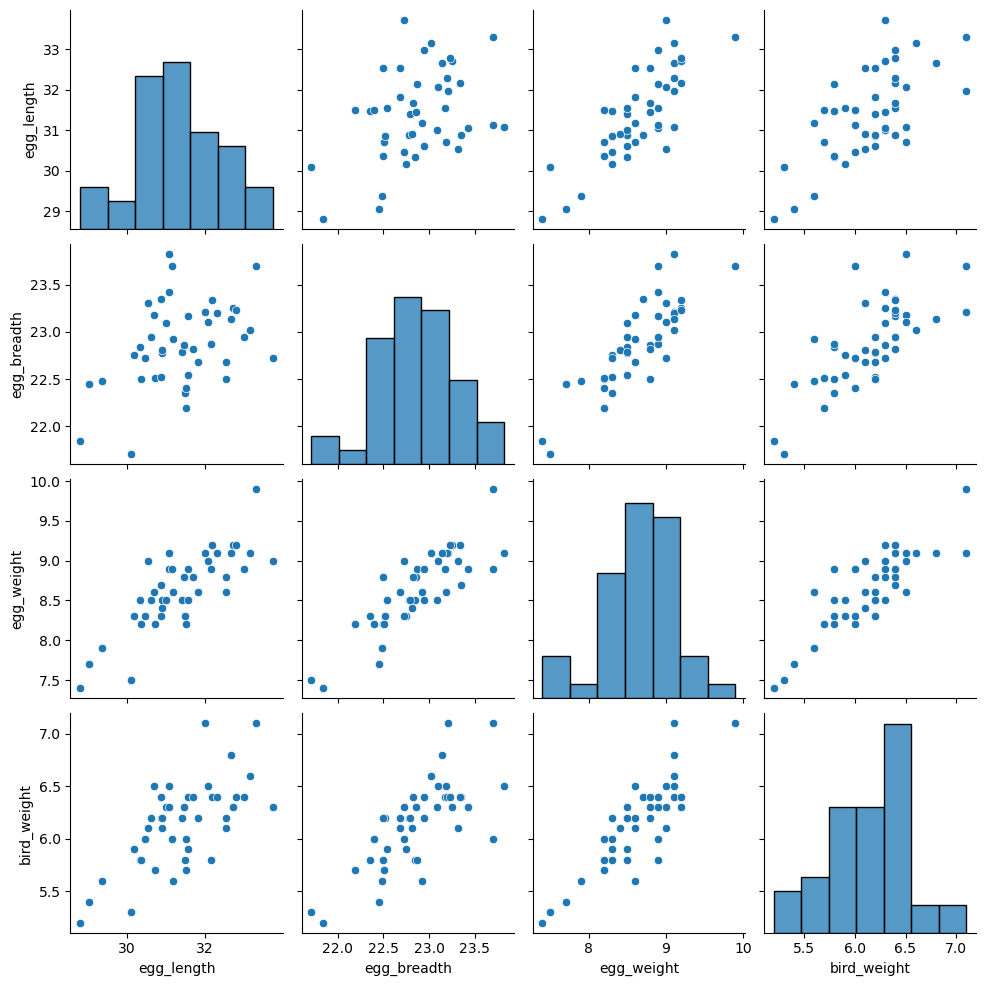

In [7]:
import seaborn as sns
sns.pairplot(eggs[["egg_length", "egg_breadth", "egg_weight", 'bird_weight']]);

This issue is known as **colinearity**, sometimes also called **multicolinearity**. Collinearity occurs when one feature can be predicted fairly accurately by a linear combination of the other features, which happens when one feature is highly correlated with the others. 

Why is colinearity a problem? Its consequences span several aspects of the modeling process:

* **Inference**: Slopes can't be interpreted for an inference task.
* **Model Variance**: If features strongly influence one another, even small changes in the sampled data can lead to large changes in the estimated slopes.
* **Unique Solution**: If one feature is a linear combination of the other features, the design matrix will not be full rank, and $\mathbb{X}^{\top}\mathbb{X}$ is not invertible. This means that least squares does not have a unique solution.

The take-home point is that we need to be careful with what features we select for modeling. If two features likely encode similar information, it is often a good idea to choose only one of them as an input variable.

### A Simpler Model

Let us now consider a more interpretable model: we instead assume a true relationship using only egg weight:

$$f_\theta(x) = \theta_0 + \theta_1 \text{egg\_weight} + \epsilon$$

In [8]:
from sklearn.linear_model import LinearRegression
X_int = eggs[["egg_weight"]]
Y_int = eggs["bird_weight"]

model_int = LinearRegression()

model_int.fit(X_int, Y_int)

# This gives an array containing the fitted model parameter estimates
thetas_int = model_int.coef_

# Put the parameter estimates in a nice table for viewing
pd.DataFrame({"theta_hat":[model_int.intercept_, thetas_int[0]]}, index=["theta_0", "theta_1"])

,theta_hat
theta_0,-0.058272
theta_1,0.718515


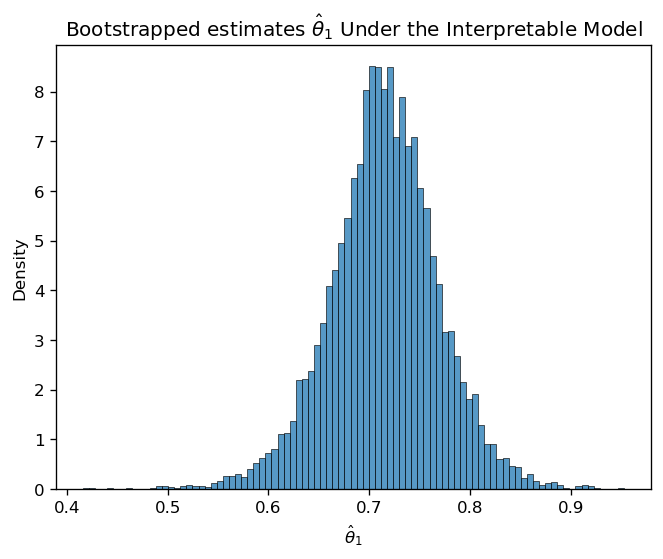

In [9]:
#| code-fold: false
import matplotlib.pyplot as plt

# Set a random seed so you generate the same random sample as staff
# In the "real world", we wouldn't do this
np.random.seed(1337)

# Set the sample size of each bootstrap sample
n = len(eggs)

# Create a list to store all the bootstrapped estimates
estimates_int = []

# Generate a bootstrap resample from `eggs` and find an estimate for theta_1 using this sample. 
# Repeat 10000 times.
for i in range(10000):
    bootstrap_resample_int = eggs.sample(n, replace=True)
    X_bootstrap_int = bootstrap_resample_int[["egg_weight"]]
    Y_bootstrap_int = bootstrap_resample_int["bird_weight"]
    
    bootstrap_model_int = LinearRegression()
    bootstrap_model_int.fit(X_bootstrap_int, Y_bootstrap_int)
    bootstrap_thetas_int = bootstrap_model_int.coef_
    
    estimates_int.append(bootstrap_thetas_int[0])

plt.figure(dpi=120)
sns.histplot(estimates_int, stat="density")
plt.xlabel(r"$\hat{\theta}_1$")
plt.title(r"Bootstrapped estimates $\hat{\theta}_1$ Under the Interpretable Model");

Notice how the interpretable model performs almost as well as our other model:

In [10]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y, model.predict(X))
rmse_int = mean_squared_error(Y_int, model_int.predict(X_int))
print(f'RMSE of Original Model: {rmse}')
print(f'RMSE of Interpretable Model: {rmse_int}')

RMSE of Original Model: 0.04547085380275766
RMSE of Interpretable Model: 0.046493941375556846


Yet, the confidence interval for the true parameter $\theta_{1}$ does not contain zero.

In [11]:
lower_int = np.percentile(estimates_int, 2.5)
upper_int = np.percentile(estimates_int, 97.5)

conf_interval_int = (lower_int, upper_int)
conf_interval_int

(0.6029335250209632, 0.8208401738546206)

In retrospect, it’s no surprise that the weight of an egg best predicts the weight of a newly-hatched chick.

A model with highly correlated variables prevents us from interpreting how the variables are related to the prediction.

### Reminder: Assumptions Matter

Keep the following in mind:
All inference assumes that the regression model holds.

* If the model doesn’t hold, the inference might not be valid.
* If the [assumptions of the bootstrap](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html?highlight=p%20value%20confidence%20interval#care-in-using-the-bootstrap-percentile-method) don’t hold…
    * Sample size n is large
    * Sample is representative of population distribution (drawn i.i.d., unbiased)
    
    …then the results of the bootstrap might not be valid.

## (Bonus) Correlation and Causation

Let us consider some questions in an arbitrary regression problem. 

What does $\theta_{j}$ mean in our regression?

* Holding other variables fixed, how much should our prediction change with $X_{j}$?

For simple linear regression, this boils down to the correlation coefficient

* Does having more $x$ predict more $y$ (and by how much)?

**Examples**:

* Are homes with granite countertops worth more money?
* Is college GPA higher for students who win a certain scholarship?
* Are breastfed babies less likely to develop asthma?
* Do cancer patients given some aggressive treatment have a higher 5-year survival rate?
* Are people who smoke more likely to get cancer? 

These sound like causal questions, but they are not!

### Prediction vs Causation
The difference between correlation/prediction vs. causation is best illustrated through examples. 

Some questions about **correlation / prediction** include:

* Are homes with granite countertops worth more money?
* Is college GPA higher for students who win a certain scholarship?
* Are breastfed babies less likely to develop asthma?
* Do cancer patients given some aggressive treatment have a higher 5-year survival rate?
* Are people who smoke more likely to get cancer? 

Some questions about **causality** include:

* How much do granite countertops **raise** the value of a house?
* Does getting the scholarship **improve** students’ GPAs?
* Does breastfeeding **protect** babies against asthma?
* Does the treatment **improve** cancer survival?
* Does smoking **cause** cancer?

Causal questions are about the **effects** of **interventions** (not just passive observation). Note, however, that regression coefficients are sometimes called “effects”, which can be deceptive!

When using data alone, **predictive questions** (i.e. are breastfed babies healthier?) can be answered, but **causal questions:** (i.e. does breastfeeding improve babies’ health?) cannot. The reason for this is that there are many possible causes for our predictive question. For example, possible explanations for why breastfed babies are healthier on average include:

1. **Causal effect:** breastfeeding makes babies healthier
2. **Reverse causality:** healthier babies more likely to successfully breastfeed
3. **Common cause:** healthier / richer parents have healthier babies and are more likely to breastfeed

We cannot tell which explanations are true (or to what extent) just by observing ($x$,$y$) pairs.

Additionally, causal questions implicitly involve **counterfactuals**, events that didn't happen. For example, we could ask, **would** the **same** breastfed babies have been less healthy **if** they hadn’t been breastfed? Explanation 1 from above implies they would be, but explanations 2 and 3 do not. 

### Confounders
Let T represent a treatment (for example, alcohol use), and Y represent an outcome (for example, lung cancer).

<img src="images/confounder.png" alt='confounder' width='600'>

A **confounder** is a variable that affects both T and Y, distorting the correlation between them. Using the example above. Confounders can be a measured covariate or an unmeasured variable we don’t know about, and they generally cause problems, as the relationship between T and Y is really affected by data we cannot see. 

**Common assumption:** all confounders are observed (**ignorability**)

### Terminology

Let us define some terms that will help us understand causal effects.

In prediction, we had two kinds of variables: 

- **Response** ($Y$): what we are trying to predict
- **Predictors** ($X$): inputs to our prediction

Other variables in causal inference include: 

- **Response** ($Y$): the outcome of interest
- **Treatment** ($T$): the variable we might intervene on
- **Covariate** ($X$): other variables we measured that may affect $T$ and/or $Y$

For this lecture, $T$ is a **binary (0/1)** variable:

### Neyman-Rubin Causal Model

Causal questions are about **counterfactuals**:

- What would have happened if T were different?
- What will happen if we set T differently in the future?

We assume every individual has two **potential outcomes**:

- $Y_{i}(1)$: value of $y_{i}$ if $T_{i} = 1$ (**treated outcome**)
- $Y_{i}(0)$: value of $y_{i}$ if $T_{i} = 0$ (**control outcome**)

For each individual in the data set, we observe:

- Covariates $x_{i}$
- Treatment $T_{i}$
- Response $y_{i} = Y_{i}(T_{i})$

We will assume ($x_{i}$, $T_{i}$, $y_{i} = Y_{i}(T_{i})$) tuples iid for $i = 1,..., n$

### Average Treatment Effect

For each individual, the **treatment effect** is $Y_{i}(1)-Y_{i}(0)$

The most common thing to estimate is the **Average Treatment Effect (ATE)**

$$ATE = \mathbb{E}[Y(1)-Y(0)] = \mathbb{E}[Y(1)] - \mathbb{E}[Y(0)]$$

Can we just take the sample mean?

$$\hat{ATE} = \frac{1}{n}\sum_{i=1}^{n}Y_{i}(1) - Y_{i}(0)$$

We cannot. Why? We only observe one of $Y_{i}(1)$, $Y_{i}(0)$.

**Fundamental problem of causal inference:** We only ever observe one potential outcome

To draw causal conclusions, we need some causal assumption relating the observed to the unobserved units

Instead of $\frac{1}{n}\sum_{i=1}^{n}Y_{i}(1) - Y_{i}(0)$, what if we took the difference between the sample mean for each group?

$$\hat{ATE} = \frac{1}{n_{1}}\sum_{i: T_{i} = 1}{Y_{i}(1)} - \frac{1}{n_{0}}\sum_{i: T_{i} = 0}{Y_{i}(0)} = \frac{1}{n_{1}}\sum_{i: T_{i} = 1}{y_{i}} - \frac{1}{n_{0}}\sum_{i: T_{i} = 0}{y_{i}}$$

Is this estimator of $ATE$ unbiased? Thus, this proposed $\hat{ATE}$ is not suitable for our purposes.

If treatment assignment comes from random coin flips, then the treated units are an iid random sample of size $n_{1}$ from the population of $Y_{i}(1)$.

This means that, 

$$\mathbb{E}[\frac{1}{n_{1}}\sum_{i: T_{i} = 1}{y_{i}}] = \mathbb{E}[Y_{i}(1)]$$

Similarly, 

$$\mathbb{E}[\frac{1}{n_{0}}\sum_{i: T_{i} = 0}{y_{i}}] = \mathbb{E}[Y_{i}(0)]$$

which allows us to conclude that $\hat{ATE}$ is an unbiased estimator of $ATE$:

$$\mathbb{E}[\hat{ATE}] = ATE$$

### Randomized Experiments

However, often, randomly assigning treatments is impractical or unethical. For example, assigning a treatment of cigarettes would likely be impractical and unethical.

An alternative to bypass this issue is to utilize **observational studies**.

Experiments:

<img src="images/experiment.png" alt='experiment' width='600'>

Observational Study:

<img src="images/observational.png" alt='observational' width='600'>

### Covariate Adjustment

What to do about confounders?

- **Ignorability assumption:** all important confounders are in the data set! 

**One idea:** come up with a model that includes them, such as:

$$Y_{i}(t) = \theta_{0} + \theta_{1}x_{1} + ... + \theta_{p}x_{p} + \tau{t} + \epsilon$$

**Question:** what is the $ATE$ in this model? $\tau$

This approach can work but is **fragile**. Breaks if:

- Important covariates are missing or true dependence on $x$ is nonlinear
- Sometimes pejoratively called **“causal inference”**

<img src="images/ignorability.png" alt='ignorability' width='600'>

#### Covariate adjustment without parametric assumptions

What to do about confounders?

- **Ignorability assumption:** all possible confounders are in the data set! 

**One idea:** come up with a model that includes them, such as:

$$Y_{i}(t) = f_{\theta}(x, t) + \epsilon$$

Then:

$$ATE = \frac{1}{n}\sum_{i=1}^{n}{f_{\theta}(x_i, 1) - f_{\theta}(x_i, 0)}$$

With enough data, we may be able to learn $f_{\theta}$ very accurately

- Very difficult if x is high-dimensional / its functional form is highly nonlinear
- Need additional assumption: **overlap**

### Other Methods

Causal inference is hard, and covariate adjustment is often not the best approach

Many other methods are some combination of:

- Modeling treatment T as a function of covariates x
- Modeling the outcome y as a function of x, T

What if we don’t believe in ignorability? Other methods look for a

- Favorite example: **regression discontinuity**


## (Bonus) Proof of Bias-Variance Decomposition

This section walks through the detailed derivation of the Bias-Variance Decomposition in the Bias-Variance Tradeoff section earlier in this note.

:::{.callout collapse="true"}
### Click to show
We want to prove that the model risk can be decomposed as

$$
\begin{align*}
E\left[(Y(x)-\hat{Y}(x))^2\right] &= E[\epsilon^2] + \left(g(x)-E\left[\hat{Y}(x)\right]\right)^2 + E\left[\left(E\left[\hat{Y}(x)\right] - \hat{Y}(x)\right)^2\right].
\end{align*}
$$

To prove this, we will first need the following lemma:

<center>If $V$ and $W$ are independent random variables then $E[VW] = E[V]E[W]$.</center>

We will prove this in the discrete finite case. Trust that it's true in greater generality.

The job is to calculate the weighted average of the values of $VW$, where the weights are the probabilities of those values. Here goes.

\begin{align*}
E[VW] ~ &= ~ \sum_v\sum_w vwP(V=v \text{ and } W=w) \\
&= ~ \sum_v\sum_w vwP(V=v)P(W=w) ~~~~ \text{by independence} \\
&= ~ \sum_v vP(V=v)\sum_w wP(W=w) \\
&= ~ E[V]E[W]
\end{align*}

Now we go into the actual proof:

### Goal
Decompose the model risk into recognizable components.

### Step 1
$$
\begin{align*}
\text{model risk} ~ &= ~ E\left[\left(Y - \hat{Y}(x)\right)^2 \right] \\
&= ~ E\left[\left(g(x) + \epsilon - \hat{Y}(x)\right)^2 \right] \\
&= ~ E\left[\left(\epsilon + \left(g(x)- \hat{Y}(x)\right)\right)^2 \right] \\
&= ~ E\left[\epsilon^2\right] + 2E\left[\epsilon \left(g(x)- \hat{Y}(x)\right)\right] + E\left[\left(g(x) - \hat{Y}(x)\right)^2\right]\\
\end{align*}
$$

On the right hand side: 

- The first term is the observation variance $\sigma^2$.
- The cross product term is 0 because $\epsilon$ is independent of $g(x) - \hat{Y}(x)$ and $E(\epsilon) = 0$
- The last term is the mean squared difference between our predicted value and the value of the true function at $x$

### Step 2
At this stage we have

$$
\text{model risk} ~ = ~ E\left[\epsilon^2\right] + E\left[\left(g(x) - \hat{Y}(x)\right)^2\right]
$$

We don't yet have a good understanding of $g(x) - \hat{Y}(x)$. But we do understand the deviation $D_{\hat{Y}(x)} = \hat{Y}(x) - E\left[\hat{Y}(x)\right]$. We know that

- $E\left[D_{\hat{Y}(x)}\right] ~ = ~ 0$
- $E\left[D_{\hat{Y}(x)}^2\right] ~ = ~ \text{model variance}$

So let's add and subtract $E\left[\hat{Y}(x)\right]$ and see if that helps.

$$
g(x) - \hat{Y}(x) ~ = ~ \left(g(x) - E\left[\hat{Y}(x)\right] \right) + \left(E\left[\hat{Y}(x)\right] - \hat{Y}(x)\right) 
$$

The first term on the right hand side is the model bias at $x$. The second term is $-D_{\hat{Y}(x)}$. So

$$
g(x) - \hat{Y}(x) ~ = ~ \text{model bias} - D_{\hat{Y}(x)}
$$

### Step 3

Remember that the model bias at $x$ is a constant, not a random variable. Think of it as your favorite number, say 10. Then 
$$
\begin{align*}
E\left[ \left(g(x) - \hat{Y}(x)\right)^2 \right] ~ &= ~ \text{model bias}^2 - 2(\text{model bias})E\left[D_{\hat{Y}(x)}\right] + E\left[D_{\hat{Y}(x)}^2\right] \\
&= ~ \text{model bias}^2 - 0 + \text{model variance} \\
&= ~ \text{model bias}^2 + \text{model variance}
\end{align*}
$$

Again, the cross-product term is $0$ because $E\left[D_{\hat{Y}(x)}\right] ~ = ~ 0$.

### Step 4: Bias-Variance Decomposition

In Step 2 we had

$$
\text{model risk} ~ = ~ \text{observation variance} + E\left[\left(g(x) - \hat{Y}(x)\right)^2\right]
$$

Step 3 showed

$$
E\left[ \left(g(x) - \hat{Y}(x)\right)^2 \right] ~ = ~ \text{model bias}^2 + \text{model variance}
$$

Thus we have shown the bias-variance decomposition:

$$
\text{model risk} = \text{observation variance} + \text{model bias}^2 + \text{model variance}.
$$

That is,

$$
E\left[(Y(x)-\hat{Y}(x))^2\right] = \sigma^2 + \left(E\left[\hat{Y}(x)\right] - g(x)\right)^2 + E\left[\left(\hat{Y}(x)-E\left[\hat{Y}(x)\right]\right)^2\right]
$$
:::